In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
import matplotlib.pyplot as plt
%matplotlib inline
df = df.loc[df['continent'] == "Europe"]
df['new_cases'] = df['new_cases'].fillna(0)

In [2]:
df.isnull().sum()

iso_code                                       0
continent                                      0
location                                       0
date                                           0
total_cases                                 1156
                                           ...  
human_development_index                     7194
excess_mortality_cumulative_absolute       40594
excess_mortality_cumulative                40594
excess_mortality                           40594
excess_mortality_cumulative_per_million    40594
Length: 67, dtype: int64

In [3]:
len(df['location'].unique())

51

In [4]:
len(df['male_smokers'].unique())

39

In [5]:
df['male_smokers'] = df['male_smokers'].fillna(0)
df = df.loc[df['male_smokers'] != 0]
len(df['male_smokers'].unique())

38

In [6]:
countries = df['location'].unique()
len(countries)

40

In [7]:
data_ms = df.groupby(['location']).mean()['male_smokers']
data_index = df.groupby(['location']).mean()['human_development_index']
data_poverty = df.groupby(['location']).mean()['extreme_poverty']
data_65 = df.groupby(['location']).mean()['aged_65_older']
data_70 = df.groupby(['location']).mean()['aged_70_older'] 
data_diabet = df.groupby(['location']).mean()['diabetes_prevalence'] 
data_hand = df.groupby(['location']).mean()['handwashing_facilities']
data_hospital = df.groupby(['location']).mean()['hospital_beds_per_thousand']
data_life= df.groupby(['location']).mean()['life_expectancy']
data_gdp = df.groupby(['location']).mean()['gdp_per_capita']

In [8]:
data_ms.columns =['location', 'male_smokers'] 

In [9]:
data_ms

location
Albania                   51.2
Andorra                   37.8
Austria                   30.9
Belarus                   46.1
Belgium                   31.4
Bosnia and Herzegovina    47.7
Bulgaria                  44.4
Croatia                   39.9
Cyprus                    52.7
Czechia                   38.3
Denmark                   18.8
Estonia                   39.3
Finland                   22.6
France                    35.6
Germany                   33.1
Greece                    52.0
Hungary                   34.8
Iceland                   15.2
Ireland                   25.7
Italy                     27.8
Latvia                    51.0
Lithuania                 38.0
Luxembourg                26.0
Malta                     30.2
Moldova                   44.6
Montenegro                47.9
Netherlands               27.3
Norway                    20.7
Poland                    33.1
Portugal                  30.0
Romania                   37.1
Russia                    58.3

In [10]:
sort_data_ms = data_ms.sort_values()

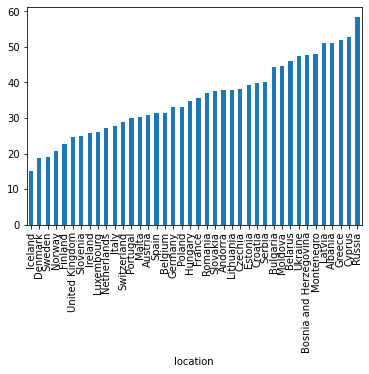

In [11]:
sort_data_ms.plot.bar(x='location', y='male_smokers')
plt.show()

In [12]:
data_fms = df.groupby(['location']).mean()['female_smokers']
data_fms.columns =['location', 'female_smokers']
sort_data_fms = data_fms.sort_values()

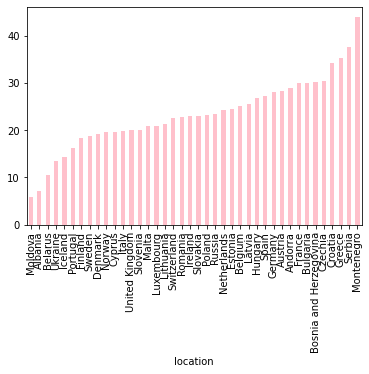

In [13]:
sort_data_fms.plot.bar(x='location', y='female_smokers',color = 'pink')
plt.show()

/tmp/ipykernel_42737/1272230856.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_death = df.groupby(['location']).max()['new']


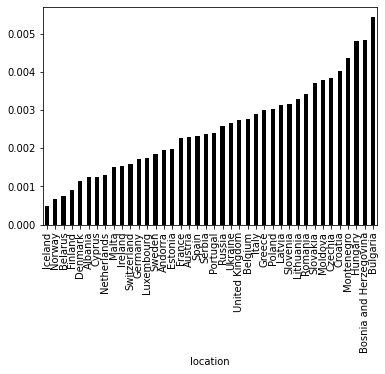

In [14]:
df['new'] = df['total_deaths']/df['population']
data_death = df.groupby(['location']).max()['new']
data_death.columns =['location', 'total_deaths']
sort_data_death = data_death.sort_values()
sort_data_death.plot.bar(x='location', y='total_deaths',color = 'black')
plt.show()

In [15]:
data = pd.DataFrame({'female_smokers': data_fms, 'male_smokers': data_ms,'total_deaths' : data_death, 
        'human_development_index' : data_index, 'extreme_poverty' : data_poverty,'diabetes_prevalence': data_diabet, 'aged_65_older' : data_65
                    ,'aged_70_older' : data_70, 'hospital_beds_per_thousand' : data_hospital, 'handwashing_facilities': data_hand
                    ,'life_expectancy' : data_life, 'gdp_per_capita' : data_gdp}).reset_index()
,

''

In [16]:
data.isnull().sum()

location                       0
female_smokers                 0
male_smokers                   0
total_deaths                   0
human_development_index        0
extreme_poverty               12
diabetes_prevalence            0
aged_65_older                  1
aged_70_older                  2
hospital_beds_per_thousand     1
handwashing_facilities        37
life_expectancy                0
gdp_per_capita                 1
dtype: int64

In [17]:
data.dropna(subset=['extreme_poverty'], inplace=True)
data.isnull().sum()

location                       0
female_smokers                 0
male_smokers                   0
total_deaths                   0
human_development_index        0
extreme_poverty                0
diabetes_prevalence            0
aged_65_older                  0
aged_70_older                  0
hospital_beds_per_thousand     0
handwashing_facilities        26
life_expectancy                0
gdp_per_capita                 0
dtype: int64

coefficient of determination for men: 0.30434152284985727


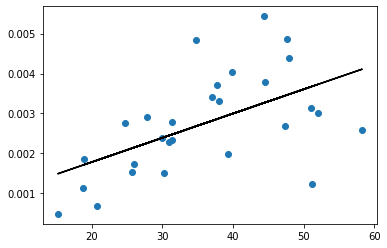

In [18]:
from sklearn.linear_model import LinearRegression
x = data['male_smokers'].values.reshape((-1,1))
y = data['total_deaths'].values
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination for men:', r_sq)
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='black')

coefficient of determination for women: 0.2540893166550743


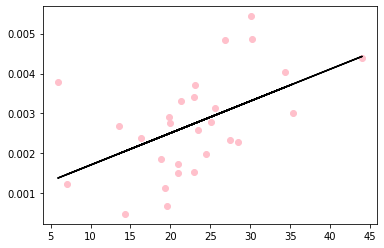

In [19]:
x1 = data['female_smokers'].values.reshape((-1,1))
y1 = data['total_deaths'].values
model = LinearRegression()
model.fit(x1, y1)
r_sq = model.score(x1, y1)
print('coefficient of determination for women:', r_sq)
plt.scatter(x1, y1,color = 'pink')
plt.plot(x1, model.predict(x1), color='black')

coefficient of determination: 0.4438994904405209


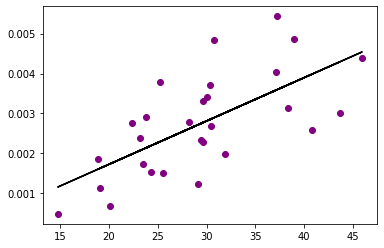

In [20]:
data['smokers'] = (data['female_smokers'] + data['male_smokers'])/2
x2 = data['smokers'].values.reshape((-1,1))
y2 = data['total_deaths'].values
model = LinearRegression()
model.fit(x2, y2)
r_sq = model.score(x2, y2)
print('coefficient of determination:', r_sq)
plt.scatter(x2, y2,color = 'purple')
plt.plot(x2, model.predict(x2), color='black')

coefficient of determination: 0.3904573086728471


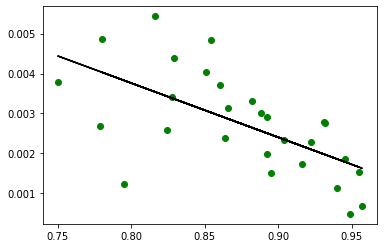

In [21]:
x3 = data['human_development_index'].values.reshape((-1,1))
y3 = data['total_deaths'].values
model = LinearRegression()
model.fit(x3, y3)
r_sq = model.score(x3, y3)
print('coefficient of determination:', r_sq)
plt.scatter(x3, y3,color = 'green')
plt.plot(x3, model.predict(x3), color='black')

In [22]:
data['human_development_index'] = data['human_development_index']*100
x4 = data[[ 'aged_70_older', 'human_development_index','extreme_poverty','diabetes_prevalence','male_smokers', 'female_smokers',
           'hospital_beds_per_thousand', 'life_expectancy', 'gdp_per_capita']]
y4 = data['total_deaths']*10000
data

,location,female_smokers,male_smokers,total_deaths,human_development_index,extreme_poverty,diabetes_prevalence,aged_65_older,aged_70_older,hospital_beds_per_thousand,handwashing_facilities,life_expectancy,gdp_per_capita,smokers
0,Albania,7.1,51.2,0.001244,79.5,1.1,10.08,13.188,8.643,2.890,NaN,78.57,11803.431,29.15
2,Austria,28.4,30.9,0.002285,92.2,0.7,6.35,19.202,13.748,7.370,NaN,81.54,45436.686,29.65
4,Belgium,25.1,31.4,0.002779,93.1,0.2,4.29,18.571,12.849,5.640,NaN,81.63,42658.576,28.25
5,Bosnia and Herzegovina,30.2,47.7,0.004856,78.0,0.2,10.08,16.569,10.711,3.500,97.164,77.40,11713.895,38.95
6,Bulgaria,30.1,44.4,0.005434,81.6,1.5,5.81,20.801,13.272,7.454,NaN,75.05,18563.307,37.25
7,Croatia,34.3,39.9,0.004027,85.1,0.7,5.59,19.724,13.053,5.540,NaN,78.49,22669.797,37.10
10,Denmark,19.3,18.8,0.001142,94.0,0.2,6.41,19.677,12.325,2.500,NaN,80.90,46682.515,19.05
11,Estonia,24.5,39.3,0.001978,89.2,0.5,4.02,19.452,13.491,4.690,NaN,78.74,29481.252,31.90
15,Greece,35.3,52.0,0.003004,88.8,1.5,4.55,20.396,14.524,4.210,NaN,82.24,24574.382,43.65
16,Hungary,26.8,34.8,0.004829,85.4,0.5,7.55,18.577,11.976,7.020,NaN,76.88,26777.561,30.80


In [23]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x4_train, y4_train)
coeff_df = pd.DataFrame(regressor.coef_, x4.columns, columns=['Coefficient'])
coeff_df

,Coefficient
aged_70_older,0.951497
human_development_index,-2.966266
extreme_poverty,0.034306
diabetes_prevalence,-1.896530
male_smokers,-0.807705
female_smokers,1.229210
hospital_beds_per_thousand,-0.015963
life_expectancy,-0.460566
gdp_per_capita,-0.000046


In [24]:
y_pred = regressor.predict(x4_test)
end = pd.DataFrame({'Actual': y4_test, 'Predicted': y_pred})
end

,Actual,Predicted
4,27.785577,20.005775
31,25.830454,25.997814
21,33.054014,29.825477
24,37.987840,37.301078
7,40.269597,48.284843
18,15.441612,11.464230


In [25]:
from sklearn.metrics import r2_score
r2_score(y4_test,y_pred)

0.6329735906173819

/home/olya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/olya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


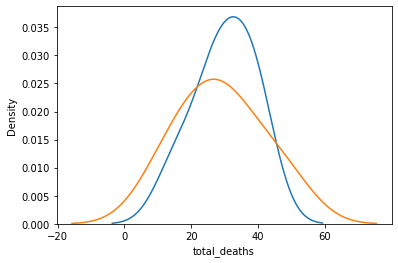

In [26]:
import seaborn as sns
g = sns.distplot(y4_test,hist = False)
g = sns.distplot(y_pred, hist = False)

In [27]:
df.isnull().sum().head(6)

iso_code         0
continent        0
location         0
date             0
total_cases    123
new_cases        0
dtype: int64

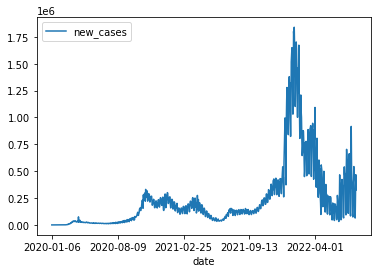

In [28]:
cases = df.groupby(['date']).sum()['new_cases'].reset_index()
cases.columns =['date', 'new_cases']
cases.plot(x = 'date', y = 'new_cases')
plt.show()

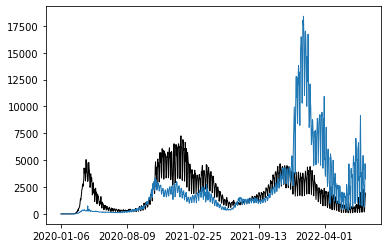

In [29]:
import matplotlib.ticker as ticker
new_death = df.groupby(['date']).sum()['new_deaths'].reset_index()
new_death.columns =['date', 'new_deaths']
x = cases['date']
y1 = cases['new_cases']/100
y2 = new_death['new_deaths']
fig, ax = plt.subplots()


ax.plot(x, y2, color = 'black', linewidth = 1)
ax.plot(x, y1,  linewidth = 1)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))


fig.set_figwidth(6)
fig.set_figheight(4)

plt.savefig('eurr.png')